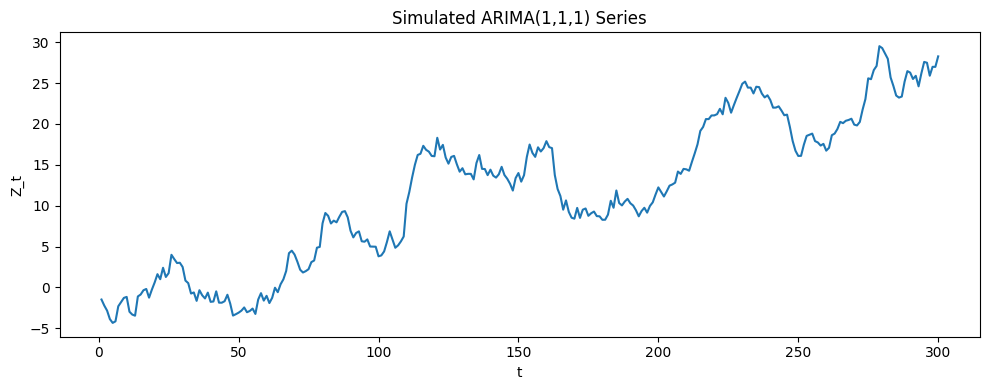


=== Ringkasan Model ARIMA(1,1,1) ===

                               SARIMAX Results                                
Dep. Variable:                    Z_t   No. Observations:                  300
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -415.975
Date:                Fri, 14 Nov 2025   AIC                            837.950
Time:                        06:50:17   BIC                            849.051
Sample:                             0   HQIC                           842.393
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5627      0.256      2.200      0.028       0.061       1.064
ma.L1         -0.4166      0.283     -1.474      0.141      -0.971       0.137
sigma2       

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# ===============================
# 1. PARAMETER SIMULASI
# ===============================
phi1 = 0.6      # AR(1) coefficient untuk W_t
theta1 = 0.4    # MA(1) coefficient untuk W_t
sigma = 1.0     # noise std
n = 300         # panjang data akhir
burn = 100      # burn-in

# ===============================
# 2. SIMULASI W_t (ARMA(1,1))
#    W_t = phi1 W_{t-1} + a_t – theta1 a_{t-1}
# ===============================
total = n + burn
a = np.random.normal(0, sigma, total)
W = np.zeros(total)

for t in range(1, total):
    W[t] = phi1 * W[t-1] + a[t] - theta1 * a[t-1]

# buang burn-in
W = W[burn:]
a = a[burn:]

# ===============================
# 3. DAPATKAN Z_t (ARIMA = integrasi W_t)
#    Z_t = sum(W)
# ===============================
Z = np.cumsum(W)
time_index = pd.RangeIndex(1, n+1)

series = pd.Series(Z, index=time_index, name="Z_t")

# ===============================
# 4. PLOT HASIL SIMULASI
# ===============================
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title("Simulated ARIMA(1,1,1) Series")
plt.xlabel("t")
plt.ylabel("Z_t")
plt.tight_layout()
plt.show()

# ===============================
# 5. FIT ARIMA(1,1,1) (jika statsmodels tersedia)
# ===============================
try:
    from statsmodels.tsa.arima.model import ARIMA

    model = ARIMA(series, order=(1,1,1))
    res = model.fit()

    print("\n=== Ringkasan Model ARIMA(1,1,1) ===\n")
    print(res.summary())

    # Forecast 10 langkah ke depan
    forecast = res.get_forecast(steps=10)
    print("\n=== Forecast 10 Langkah ===")
    print(forecast.predicted_mean)

except Exception as e:
    print("statsmodels tidak tersedia, hanya simulasi yang dijalankan.")
    print(e)
